# นักคณิตศาสตร์การเงิน ทำอะไรกันบ้าง?

## Pricing
การกำหนดราคา สินทรัพท์ทางการเงิน เช่น Option

## Simulation
จำลองการเคลื่อนไหวของราคา Underlying Assets

### Geometric Brownian Motion

In [14]:
# import libs
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [15]:
# Download Data
interval = '1d'
start = '2023-1-1'
end = '2025-1-1'

btc_ticker = yf.Ticker('BTC-USD')
btc = btc_ticker.history(interval='1d',start=start,end=end)

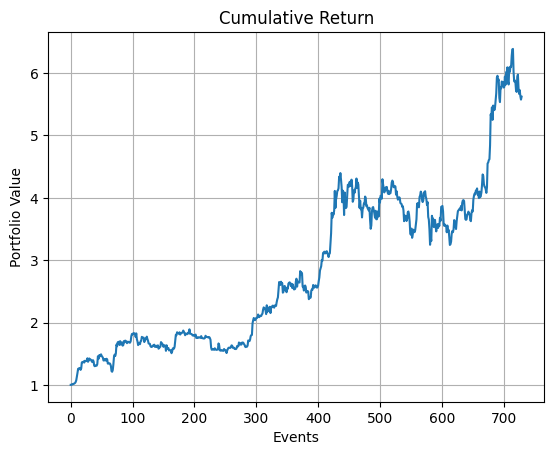

In [16]:
# Make the log return events 
btc_ret = np.log(btc['Close']).diff(periods=1).dropna().values

btc_portfolio = np.cumsum(btc_ret)

plt.xlabel('Events')
plt.ylabel('Portfolio Value')
plt.title('Cumulative Return')
plt.grid(True)
plt.plot(np.exp(btc_portfolio));

We assume the data follows a **log-normal distribution**, as is typical in financial modeling using geometric Brownian motion (GBM). The asset price evolution is modeled as:

$$
dX_t = \mu X_t\,dt + \sigma X_t\,dW_t
$$

This results in the solution:

$$
X_t = X_0 \exp\left[\left(\mu - \frac{1}{2} \sigma^2\right)t + \sigma W_t\right]
$$

Where:
- $ \mu $ is the mean return (drift)
- $ \sigma $ is the standard deviation (volatility)
- $ W_t $ is a Wiener process (Brownian motion)

In [17]:
# Parallel timeline with human assumptions (geometric Brownian motion)
# We assume the data have a log-normal distribution.
mu = btc_ret.mean() # mean of drift
sigma = btc_ret.std() # volatility of drifting
x0 = 1 # initial value
n = 365  # Number of trading days for 1 year
dt = 1 # step size is 1 day
m = 100000 # number of paths

dW = np.random.normal(0, 1, size=(m, n)) * np.sqrt(dt) 
drift = (mu - (sigma ** 2) / 2) * dt
diffusion = sigma * dW

# make the parallel timelines
x = np.exp(drift + diffusion)
btc_ret_portfolios = x0 * np.cumprod(x, axis=1)

In [18]:
mu, sigma

(np.float64(0.0023647829594467744), np.float64(0.025351160972217804))

In [19]:
dW

array([[-1.6818524 , -0.35077452, -1.89041683, ...,  1.50857053,
        -1.01602374, -0.2544015 ],
       [ 0.08429795,  0.65029995, -2.0107146 , ...,  0.20956227,
         0.73029909, -0.28231078],
       [-0.94139117, -0.40882864, -1.25830386, ..., -1.15984691,
        -0.21776906, -0.49064617],
       ...,
       [-0.14273696,  0.68916442, -0.42565282, ..., -1.41592598,
         1.60185087, -1.12794386],
       [-0.21224647,  0.57864213, -0.93462798, ..., -1.32232921,
        -0.20424368, -0.64699258],
       [ 1.17631681, -0.79374981,  0.4283141 , ..., -2.47316613,
        -0.12100711, -0.05864528]], shape=(100000, 365))

In [20]:
drift

np.float64(0.002043442278127125)

In [21]:
diffusion

array([[-0.04263691, -0.00889254, -0.04792426, ...,  0.03824401,
        -0.02575738, -0.00644937],
       [ 0.00213705,  0.01648586, -0.05097395, ...,  0.00531265,
         0.01851393, -0.00715691],
       [-0.02386536, -0.01036428, -0.03189946, ..., -0.02940347,
        -0.0055207 , -0.01243845],
       ...,
       [-0.00361855,  0.01747112, -0.01079079, ..., -0.03589537,
         0.04060878, -0.02859469],
       [-0.00538069,  0.01466925, -0.0236939 , ..., -0.03352258,
        -0.00517781, -0.01640201],
       [ 0.029821  , -0.02012248,  0.01085826, ..., -0.06269763,
        -0.00306767, -0.00148673]], shape=(100000, 365))

In [22]:
x

array([[0.96021941, 0.9931743 , 0.95515579, ..., 1.04111001, 0.97656503,
        0.99560376],
       [1.00418924, 1.01870203, 0.9522473 , ..., 1.00738321, 1.02077013,
        0.99489959],
       [0.97841446, 0.99171368, 0.97058527, ..., 0.97301087, 0.99652878,
        0.98965883],
       ...,
       [0.99842613, 1.01970621, 0.9912908 , ..., 0.96671464, 1.0435749 ,
        0.97379814],
       [0.99666831, 1.01685313, 0.97858223, ..., 0.96901117, 0.99687053,
        0.98574402],
       [1.03237755, 0.98208341, 1.01298529, ..., 0.94114864, 0.9989763 ,
        1.00055687]], shape=(100000, 365))

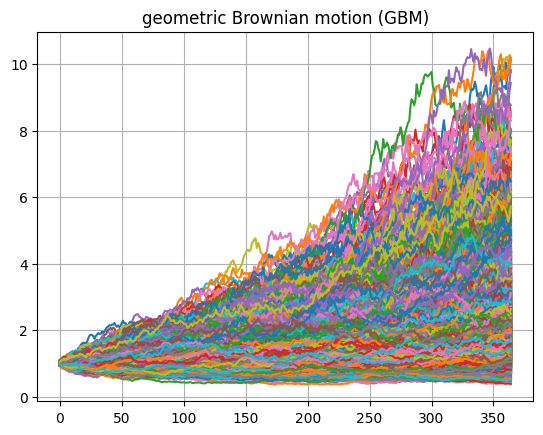

In [23]:
# plot for the first 5000 samples
for s in btc_ret_portfolios[:5000]:       
    plt.plot(s)
plt.grid(True)
plt.title('geometric Brownian motion (GBM)')
plt.show()